# Linear Regression

---
## Table of contents

* [Introduction](#in)
* [Types of Linear Regression](#ty)
     - [Simple Linear Regression](#si)
     - [Ordinary Least Squares](#or)
     - [Gradient Descent](#ga)
     - [Regularization](#re)
* [Application on Data set](#ap)
     - [Linear Regression Single Neuron Model](#li)
     - [Visualize your Errors over each Epoch](#vi)
     - [Experiment with the Learning Rate](#ex)
     

---
## Introduction<a class="anchor" id="in"></a >

Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula y = c + b*x, where y = estimated dependent variable score, c = constant, b = regression coefficient, and x = score on the independent variable.

Naming the Variables.  There are many names for a regression’s dependent variable.  It may be called an outcome variable, criterion variable, endogenous variable, or regressand.  The independent variables can be called exogenous variables, predictor variables, or regressors.

Three major uses for regression analysis are (1) determining the strength of predictors, (2) forecasting an effect, and (3) trend forecasting.

First, the regression might be used to identify the strength of the effect that the independent variable(s) have on a dependent variable.  Typical questions are what is the strength of relationship between dose and effect, sales and marketing spending, or age and income.

Second, it can be used to forecast effects or impact of changes.  That is, the regression analysis helps us to understand how much the dependent variable changes with a change in one or more independent variables.  A typical question is, “how much additional sales income do I get for each additional $1000 spent on marketing?”

Third, regression analysis predicts trends and future values.  The regression analysis can be used to get point estimates.  A typical question is, “what will the price of gold be in 6 months?”

---
## Types of Linear Regression<a class="anchor" id="ty"></a >

* **1. Simple Linear Regression**<a class="anchor" id="si"></a >

With simple linear regression when we have a single input, we can use statistics to estimate the coefficients.

This requires that you calculate statistical properties from the data such as means, standard deviations, correlations and covariance. All of the data must be available to traverse and calculate statistics.

This is fun as an exercise in excel, but not really useful in practice.

* **2. Ordinary Least Squares**<a class="anchor" id="or"></a >

When we have more than one input we can use Ordinary Least Squares to estimate the values of the coefficients.

The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together. This is the quantity that ordinary least squares seeks to minimize.

This approach treats the data as a matrix and uses linear algebra operations to estimate the optimal values for the coefficients. It means that all of the data must be available and you must have enough memory to fit the data and perform matrix operations.

It is unusual to implement the Ordinary Least Squares procedure yourself unless as an exercise in linear algebra. It is more likely that you will call a procedure in a linear algebra library. This procedure is very fast to calculate.

* **3. Gradient Descent**<a class="anchor" id="gr"></a >

When there are one or more inputs you can use a process of optimizing the values of the coefficients by iteratively minimizing the error of the model on your training data.

This operation is called Gradient Descent and works by starting with random values for each coefficient. The sum of the squared errors are calculated for each pair of input and output values. A learning rate is used as a scale factor and the coefficients are updated in the direction towards minimizing the error. The process is repeated until a minimum sum squared error is achieved or no further improvement is possible.

When using this method, you must select a learning rate (alpha) parameter that determines the size of the improvement step to take on each iteration of the procedure.

Gradient descent is often taught using a linear regression model because it is relatively straightforward to understand. In practice, it is useful when you have a very large dataset either in the number of rows or the number of columns that may not fit into memory.

* **4. Regularization**<a class="anchor" id="re"></a >

There are extensions of the training of the linear model called regularization methods. These seek to both minimize the sum of the squared error of the model on the training data (using ordinary least squares) but also to reduce the complexity of the model (like the number or absolute size of the sum of all coefficients in the model).

Two popular examples of regularization procedures for linear regression are:

    -Lasso Regression: where Ordinary Least Squares is modified to also minimize the absolute sum of the coefficients (called L1 regularization).
    -Ridge Regression: where Ordinary Least Squares is modified to also minimize the squared absolute sum of the coefficients (called L2 regularization).
    
These methods are effective to use when there is collinearity in your input values and ordinary least squares would overfit the training data.

Now that you know some techniques to learn the coefficients in a linear regression model, let’s look at how we can use a model to make predictions on new data.

---
## Application on Data set<a class="anchor" id="ap"></a >


In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the palmerpenguins dataset into a pandas DataFrame object
df = pd.read_csv("palmer_penguins.csv")

## Data exploration and wrangling

In [9]:
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [7]:
df = df[df["species"] == 'Adelie']
df.head()

df = df.dropna(how = "any")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


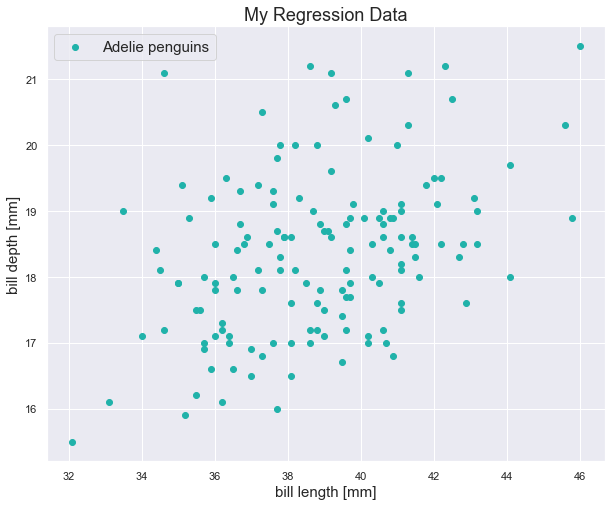

In [13]:
plt.figure(figsize = (10, 8))
plt.scatter(df.bill_length_mm, 
            df.bill_depth_mm, 
            color = "lightseagreen",
            label = "Adelie penguins")
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

## Linear Regression Single Neuron Model<a class="anchor" id="li"></a >

As discussed in a [previous lecture](https://www.youtube.com/watch?v=SmEKxsd_67w&t=1s) there exists a general machine learning model for supervised learning. In this model the optimal target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ assigns the correct labels to every possible feature measurement. Next recall that our goal is to find a reasonable hypthesis $h:\mathcal{X} \rightarrow \mathcal{Y}$, which approximates the target function $f$. 

General ML Model:

---

<p align="center">
    <img src="General_ML_Model.png" width="500">
</p>

---
Single Neuron Linear Regression Model

---

<p align="center">
    <img src="regression_neuron.png" width="500">
</p>



In [12]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)



Now that we have defined our custom ```SingleNeuron``` class, we next prep our data for training. By running the following code in the cell below, note that the first two lines of code convert the setosa sepal length column of data into a ```numpy.ndarray```. 

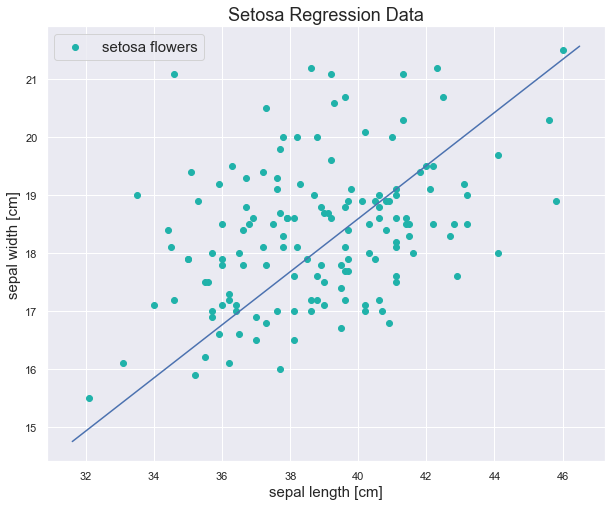

In [20]:
X = df.bill_length_mm.values
X = X.reshape(-1, 1)
y = df.bill_depth_mm.values

def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 5)
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "setosa flowers")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Adelie penguins Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

The line generated by our custom ```SingleNeuron``` class surely does not look random! We can verify this by plotting the ```errors_``` attribute that we stored while training. Note that the $i$-th entry of the ```errors_``` attribute is the *mean-sqaured error* of the neuron after the $i+1$ epoch of stochastic gradient descent. If the mean sqaured error is decreasing after each epoch we are on the right track, and our single neuron might be learning! 

We can visualize the mean-sqaured error at each epoch of our training process by running the following code in the cell below. 

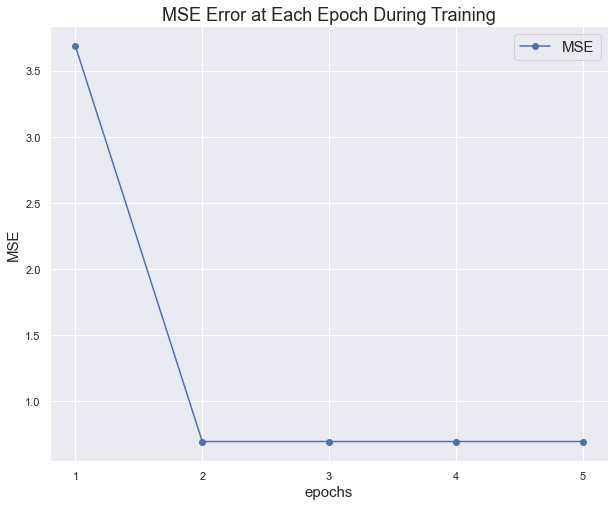

In [21]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

## Visualize your Errors over each Epoch<a class="anchor" id="vi"></a >

The mean-sqaured error is decreasing over each epoch! Next lets see what happens when we training a single neuron over 10 times more epochs than before, while leaving the learning rate unchanged. Try running the following code in the cell below (note the use of the subplots).

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

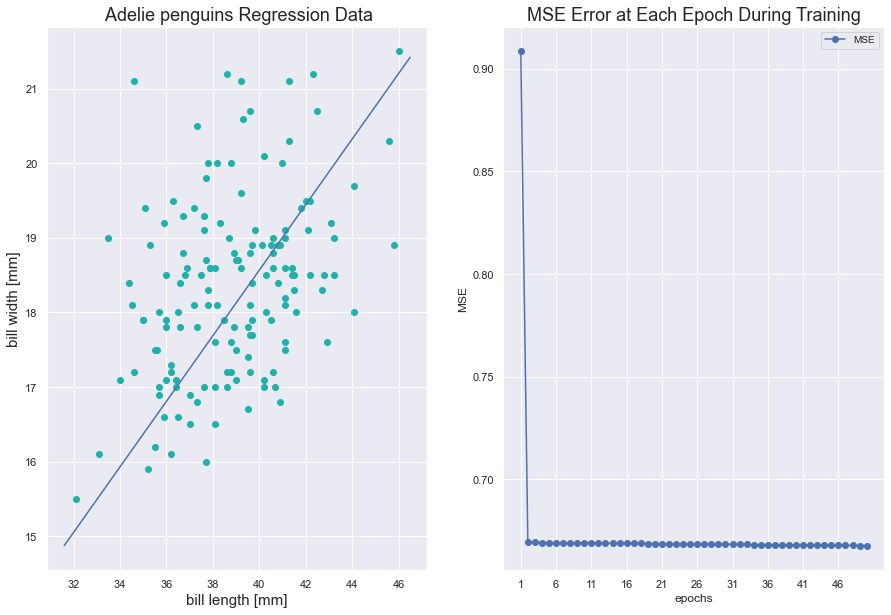

In [22]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("bill length [mm]", fontsize = 15)
ax1.set_ylabel("bill width [mm]", fontsize = 15)
ax1.set_title(" Adelie penguins Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)



## Experiment with the Learning Rate <a class="anchor" id="ex"></a >

As discussed in a previous notebook, the choice of learning rate is a crucial *hyperparamter* when implementing gradient (and stochastic gradient) descent. We can view different choices of learning rate with a fixed number of epochs by running the following code in the cell below.


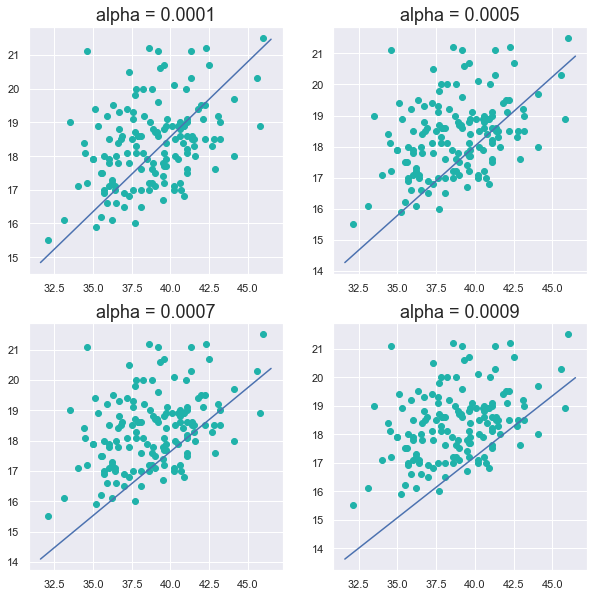

In [24]:
# Possible choices of learning rate 
alphas = [0.0001, 0.0005, 0.0007, 0.0009]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node.train(X, y, alpha = alpha, epochs = 5)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

### conclusion

From the outputs, we can see that when alpha=0.0001 can get a better regression line